In [1]:
from datetime import datetime, date
import calendar
from time import mktime
import pandas, sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from pytz import utc, timezone

datafile_16 = "Resources/FY_2016_Dallas_Animal_Shelter_Data.csv"
datafile_17 = "Resources/FY_2017_Dallas_Animal_Shelter_Data.csv"
datafile_18 = "Resources/FY_2018_Dallas_Animal_Shelter_Data.csv"
datafile_19 = "Resources/FY_2019_Dallas_Animal_Shelter_Data.csv"
datafile_20 = "Resources/FY2020_Dallas_Animal_Shelter_Data.csv"
datafile_21 = "Resources/FY2021_Dallas_Animal_Shelter_Data.csv"

df_2016 = pd.read_csv(datafile_16)
df_2017 = pd.read_csv(datafile_17)
df_2018 = pd.read_csv(datafile_18)
df_2019 = pd.read_csv(datafile_19)
df_2020 = pd.read_csv(datafile_20)
df_2021 = pd.read_csv(datafile_21)

In [2]:
#MERGE ALL FISCAL YEAR DATA INTO ONE DATAFRAME
frames = [df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]
dallas_shelter_df = pd.concat(frames)

In [3]:
dallas_shelter_df

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source Id,Census Tract,...,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Unnamed: 16,Outcome Subtype,Unnamed: 27
0,A0000000,NaN,NaN,FREEZER,UNAVAILABLE,NaN,A16-017406,1,P0000000,701,...,NaN,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,JUN.2016,FY2016,NaN,NaN,NaN
1,A0001656,DOG,LABRADOR RETR,LAB 01,LAB,NaN,NaN,1,P0003571,20500,...,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
2,A0014681,DOG,PIT BULL,PAWS 24,UNAVAILABLE,NaN,NaN,1,P0721470,12302,...,50020,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,TAGGHOUSEBROKEN/FREE ADOPT,FEB.2016,FY2016,NaN,NaN,NaN
3,A0117773,DOG,PIT BULL,LAB 01,LAB,NaN,NaN,1,P0062546,2200,...,NaN,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
4,A0119934,CAT,RUSSIAN BLUE,LOST,LOST REPORT,NaN,NaN,1,P0038200,75214,...,NaN,HEALTHY,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11017,A0701527,DOG,SCHNAUZER STAND,LFSD 03,IMPOUNDED,NaN,A21-259221,1,P0954698,12206.0,...,NaN,APP WNL,SCAN CHIP,FIELD,ITR,APR.2021,FY2021,NaN,WESTMORELD,NaN
11018,A1118116,CAT,DOMESTIC SH,N04,UNAVAILABLE,NaN,NaN,1,P0954696,7823.0,...,NaN,UNDERAGE,SCAN NO CHIP,OVER THE COUNTER,AEG,APR.2021,FY2021,NaN,UNDERAGE,NaN
11019,A1116166,DOG,GERM SHEPHERD,LOST,IMPOUNDED,NaN,NaN,0,P0951768,NaN,...,NaN,NaN,NaN,NaN,NaN,MAR.2021,FY2021,NaN,OTHER,NaN
11020,A1117299,DOG,PIT BULL,AD 003,AVAILABLE,NaN,NaN,1,P0900636,3901.0,...,NaN,APP WNL,SCAN NO CHIP,OVER THE COUNTER,JAS,APR.2021,FY2021,NaN,WESTMORELD,NaN


In [4]:
#GET RID OF DUPLICATES (SAME ANIMAL ID AND MONTH ADMITTED TO SHELTER)
dup_animals = dallas_shelter_df.loc[dallas_shelter_df.duplicated(subset = ['Animal Id', 'Month']), 'Animal Id'].unique()
dup_animal_id = pd.DataFrame(dup_animals)
dup_animal_id

,0
0,A0469113
1,A0489693
2,A0578637
3,A0660996
4,A0696700
...,...
6899,A1117310
6900,A1118114
6901,A1117945
6902,A1116461


In [5]:
dallas_shelter_clean = dallas_shelter_df[dallas_shelter_df['Animal Id'].isin(dup_animals)==False]
dallas_shelter_clean

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source Id,Census Tract,...,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Unnamed: 16,Outcome Subtype,Unnamed: 27
0,A0000000,NaN,NaN,FREEZER,UNAVAILABLE,NaN,A16-017406,1,P0000000,701,...,NaN,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,JUN.2016,FY2016,NaN,NaN,NaN
1,A0001656,DOG,LABRADOR RETR,LAB 01,LAB,NaN,NaN,1,P0003571,20500,...,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
2,A0014681,DOG,PIT BULL,PAWS 24,UNAVAILABLE,NaN,NaN,1,P0721470,12302,...,50020,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,TAGGHOUSEBROKEN/FREE ADOPT,FEB.2016,FY2016,NaN,NaN,NaN
3,A0117773,DOG,PIT BULL,LAB 01,LAB,NaN,NaN,1,P0062546,2200,...,NaN,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
4,A0119934,CAT,RUSSIAN BLUE,LOST,LOST REPORT,NaN,NaN,1,P0038200,75214,...,NaN,HEALTHY,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11014,A1100474,DOG,CHIHUAHUA SH,LFSD 18,UNAVAILABLE,NaN,A21-259249,1,P0954725,2000.0,...,NaN,APP WNL,SCAN CHIP,FIELD,AEG,APR.2021,FY2021,NaN,WESTMORELD,NaN
11017,A0701527,DOG,SCHNAUZER STAND,LFSD 03,IMPOUNDED,NaN,A21-259221,1,P0954698,12206.0,...,NaN,APP WNL,SCAN CHIP,FIELD,ITR,APR.2021,FY2021,NaN,WESTMORELD,NaN
11018,A1118116,CAT,DOMESTIC SH,N04,UNAVAILABLE,NaN,NaN,1,P0954696,7823.0,...,NaN,UNDERAGE,SCAN NO CHIP,OVER THE COUNTER,AEG,APR.2021,FY2021,NaN,UNDERAGE,NaN
11019,A1116166,DOG,GERM SHEPHERD,LOST,IMPOUNDED,NaN,NaN,0,P0951768,NaN,...,NaN,NaN,NaN,NaN,NaN,MAR.2021,FY2021,NaN,OTHER,NaN


In [6]:
#GET RID OF UNNECESSARY COLUMNS AND GET RID OF ERRORS
dallas_shelter_data_pre = dallas_shelter_clean.dropna(how='all', subset=['Animal Breed'])
dallas_shelter_data = dallas_shelter_data_pre.drop(columns=['Source Id', 'Activity Sequence', 'Receipt Number', 'Census Tract', 'Intake Time', 'Outcome Time','Tag Type', 'Activity Number', 'Service Request Number', 'Unnamed: 16','Unnamed: 27'])
dallas_shelter_data

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Council District,Intake Type,Intake Subtype,Intake Total,Reason,...,Outcome Type,Outcome Date,Impound Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype
1,A0001656,DOG,LABRADOR RETR,LAB 01,LAB,6,OWNER SURRENDER,GENERAL,1,DESTRUCTIVE AT HOME,...,EUTHANIZED,7/21/2016,K16-353536,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN
2,A0014681,DOG,PIT BULL,PAWS 24,UNAVAILABLE,7,OWNER SURRENDER,GENERAL,1,NaN,...,TRANSFER,3/31/2016,K16-338470,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,TAGGHOUSEBROKEN/FREE ADOPT,FEB.2016,FY2016,NaN
3,A0117773,DOG,PIT BULL,LAB 01,LAB,2,OWNER SURRENDER,EUTHANASIA REQUESTED,1,NaN,...,EUTHANIZED,7/5/2016,K16-351923,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN
4,A0119934,CAT,RUSSIAN BLUE,LOST,LOST REPORT,14,LOST REPORT,NaN,1,NaN,...,LOST REPORT,7/19/2016,K16-345201,HEALTHY,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN
5,A0132276,CAT,DOMESTIC SH,QC 03,RELEASED FROM QUARANTINE,10,CONFISCATED,QUARANTINE,1,NaN,...,RETURNED TO OWNER,9/27/2016,K16-359916,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,SEP.2016,FY2016,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11014,A1100474,DOG,CHIHUAHUA SH,LFSD 18,UNAVAILABLE,1.0,OWNER SURRENDER,FIELD,1,MEDICAL,...,RETURNED TO OWNER,4/16/2021,K21-524674,APP WNL,SCAN CHIP,FIELD,AEG,APR.2021,FY2021,WESTMORELD
11017,A0701527,DOG,SCHNAUZER STAND,LFSD 03,IMPOUNDED,7.0,STRAY,CONFINED,1,OTHRINTAKS,...,RETURNED TO OWNER,4/16/2021,K21-524654,APP WNL,SCAN CHIP,FIELD,ITR,APR.2021,FY2021,WESTMORELD
11018,A1118116,CAT,DOMESTIC SH,N04,UNAVAILABLE,13.0,STRAY,OTC,1,OTHRINTAKS,...,FOSTER,4/16/2021,K21-524648,UNDERAGE,SCAN NO CHIP,OVER THE COUNTER,AEG,APR.2021,FY2021,UNDERAGE
11019,A1116166,DOG,GERM SHEPHERD,LOST,IMPOUNDED,NaN,STRAY,WEB,1,NaN,...,LOST EXP,4/16/2021,K21-522659,NaN,NaN,NaN,NaN,MAR.2021,FY2021,OTHER


In [7]:
#CHECK FORMATTING OF COLUMNS (DTYPES)
dallas_shelter_data['Intake Date'] = pd.to_datetime(dallas_shelter_data['Intake Date'])
dallas_shelter_data['Outcome Date'] = pd.to_datetime(dallas_shelter_data['Outcome Date'])
dallas_shelter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172204 entries, 1 to 11020
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Animal Id               172204 non-null  object        
 1   Animal Type             172204 non-null  object        
 2   Animal Breed            172204 non-null  object        
 3   Kennel Number           172204 non-null  object        
 4   Kennel Status           172204 non-null  object        
 5   Council District        163774 non-null  object        
 6   Intake Type             172204 non-null  object        
 7   Intake Subtype          169098 non-null  object        
 8   Intake Total            144806 non-null  object        
 9   Reason                  97639 non-null   object        
 10  Staff Id                139216 non-null  object        
 11  Intake Date             172204 non-null  datetime64[ns]
 12  Due Out                 139216 

In [8]:
#ADD A COLUMN TO DF TO MEASURE LENGTH OF TIME IN SHELTER PER ANIMAL
time_in_shelter = dallas_shelter_data["Outcome Date"] - dallas_shelter_data["Intake Date"]
dallas_shelter_data.insert(1, "Time in Shelter", time_in_shelter, True)
dallas_shelter_data

,Animal Id,Time in Shelter,Animal Type,Animal Breed,Kennel Number,Kennel Status,Council District,Intake Type,Intake Subtype,Intake Total,...,Outcome Type,Outcome Date,Impound Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype
1,A0001656,0 days,DOG,LABRADOR RETR,LAB 01,LAB,6,OWNER SURRENDER,GENERAL,1,...,EUTHANIZED,2016-07-21,K16-353536,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN
2,A0014681,54 days,DOG,PIT BULL,PAWS 24,UNAVAILABLE,7,OWNER SURRENDER,GENERAL,1,...,TRANSFER,2016-03-31,K16-338470,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,TAGGHOUSEBROKEN/FREE ADOPT,FEB.2016,FY2016,NaN
3,A0117773,0 days,DOG,PIT BULL,LAB 01,LAB,2,OWNER SURRENDER,EUTHANASIA REQUESTED,1,...,EUTHANIZED,2016-07-05,K16-351923,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN
4,A0119934,12 days,CAT,RUSSIAN BLUE,LOST,LOST REPORT,14,LOST REPORT,NaN,1,...,LOST REPORT,2016-07-19,K16-345201,HEALTHY,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN
5,A0132276,2 days,CAT,DOMESTIC SH,QC 03,RELEASED FROM QUARANTINE,10,CONFISCATED,QUARANTINE,1,...,RETURNED TO OWNER,2016-09-27,K16-359916,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,SEP.2016,FY2016,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11014,A1100474,1 days,DOG,CHIHUAHUA SH,LFSD 18,UNAVAILABLE,1.0,OWNER SURRENDER,FIELD,1,...,RETURNED TO OWNER,2021-04-16,K21-524674,APP WNL,SCAN CHIP,FIELD,AEG,APR.2021,FY2021,WESTMORELD
11017,A0701527,1 days,DOG,SCHNAUZER STAND,LFSD 03,IMPOUNDED,7.0,STRAY,CONFINED,1,...,RETURNED TO OWNER,2021-04-16,K21-524654,APP WNL,SCAN CHIP,FIELD,ITR,APR.2021,FY2021,WESTMORELD
11018,A1118116,1 days,CAT,DOMESTIC SH,N04,UNAVAILABLE,13.0,STRAY,OTC,1,...,FOSTER,2021-04-16,K21-524648,UNDERAGE,SCAN NO CHIP,OVER THE COUNTER,AEG,APR.2021,FY2021,UNDERAGE
11019,A1116166,35 days,DOG,GERM SHEPHERD,LOST,IMPOUNDED,NaN,STRAY,WEB,1,...,LOST EXP,2021-04-16,K21-522659,NaN,NaN,NaN,NaN,MAR.2021,FY2021,OTHER


In [9]:
#CHECK COLUMN DTYPES AGAIN FOR NEW COLUMN FORMAT
dallas_shelter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172204 entries, 1 to 11020
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Animal Id               172204 non-null  object         
 1   Time in Shelter         171215 non-null  timedelta64[ns]
 2   Animal Type             172204 non-null  object         
 3   Animal Breed            172204 non-null  object         
 4   Kennel Number           172204 non-null  object         
 5   Kennel Status           172204 non-null  object         
 6   Council District        163774 non-null  object         
 7   Intake Type             172204 non-null  object         
 8   Intake Subtype          169098 non-null  object         
 9   Intake Total            144806 non-null  object         
 10  Reason                  97639 non-null   object         
 11  Staff Id                139216 non-null  object         
 12  Intake Date      

In [10]:
#GET SOME BASIC COUNTS TO GET A BETTER IDEA OF THE DATA
breeds = dallas_shelter_data["Animal Breed"].value_counts()
num_breeds = len(breeds)
animal_types = dallas_shelter_data["Animal Type"].value_counts()
num_animal_types = len(animal_types)
intake_types = dallas_shelter_data["Intake Type"].value_counts()
num_intake_types = len(intake_types)
origin_types = dallas_shelter_data["Animal Origin"].value_counts()
num_origin_types = len(origin_types)


print(f"Number of breeds: {num_breeds}")
print(f"Number of animal types: {num_animal_types}")
print(f"Number of intake types: {num_intake_types}")
print(f"Number of origin types: {num_origin_types}")

Number of breeds: 371
Number of animal types: 6
Number of intake types: 11
Number of origin types: 9


In [11]:
#GET MORE INFO ABOUT DATA
print(f"Data Frame: \n{dallas_shelter_data}\n")
print(f"Column Types: \n{dallas_shelter_data.dtypes}\n")

animal_types_fulllist = dallas_shelter_data['Animal Type'].tolist()

animal_types_array = dallas_shelter_data['Animal Type'].to_numpy()


Data Frame: 
      Animal Id Time in Shelter Animal Type     Animal Breed Kennel Number  \
1      A0001656          0 days         DOG    LABRADOR RETR        LAB 01   
2      A0014681         54 days         DOG         PIT BULL       PAWS 24   
3      A0117773          0 days         DOG         PIT BULL        LAB 01   
4      A0119934         12 days         CAT     RUSSIAN BLUE          LOST   
5      A0132276          2 days         CAT      DOMESTIC SH         QC 03   
...         ...             ...         ...              ...           ...   
11014  A1100474          1 days         DOG     CHIHUAHUA SH       LFSD 18   
11017  A0701527          1 days         DOG  SCHNAUZER STAND       LFSD 03   
11018  A1118116          1 days         CAT      DOMESTIC SH           N04   
11019  A1116166         35 days         DOG    GERM SHEPHERD          LOST   
11020  A1117299         13 days         DOG         PIT BULL        AD 003   

                  Kennel Status Council District  

In [12]:
#GET FULL LIST OF DIFFERNT POSSIBLE INPUTS IN COLUMNS
animal_types_list = dallas_shelter_data['Animal Type'].unique()
origin_types_list = dallas_shelter_data['Animal Origin'].unique()
intake_types_list = dallas_shelter_data['Intake Type'].unique()
intake_subtypes_list = dallas_shelter_data['Intake Subtype'].unique()
outcome_types_list = dallas_shelter_data['Outcome Type'].unique()
outcome_subtypes_list = dallas_shelter_data['Outcome Subtype'].unique()
intake_conditions_list = dallas_shelter_data['Intake Condition'].unique()
outcome_conditions_list = dallas_shelter_data['Outcome Condition'].unique()

print (f"Animal Types: {animal_types_list}")
print (f"Animal Origins: {origin_types_list}")
print (f"Intake Types: {intake_types_list}")
print (f"Intake Subtypes: {intake_subtypes_list}")
print (f"Intake Conditions: {intake_conditions_list}")
print (f"Outcome Types: {outcome_types_list}")
print (f"Outcome Subtypes: {outcome_subtypes_list}")
print (f"Outcome Conditions: {outcome_conditions_list}")

Animal Types: ['DOG' 'CAT' 'WILDLIFE' 'LIVESTOCK' 'BIRD' 'D']
Animal Origins: ['OVER THE COUNTER' 'FIELD' 'SWEEP' nan 'RAPID' 'OPS' 'AGGOPS' 'BITE'
 'CARE' 'AGGDD']
Intake Types: ['OWNER SURRENDER' 'LOST REPORT' 'CONFISCATED' 'STRAY' 'FOUND REPORT'
 'TRANSFER' 'FOSTER' 'WILDLIFE' 'TREATMENT' 'KEEPSAFE' 'DISPOS REQ']
Intake Subtypes: ['GENERAL' 'EUTHANASIA REQUESTED' nan 'QUARANTINE' 'AT LARGE'
 'POSSIBLY OWNED' '#NAME?' 'CONFINED' 'KEEP SAFE' 'RETURN30'
 'KEEP SAFE - DEAD ON ARRIVAL' 'OTHER' 'QUARANTINE - DEAD ON ARRIVAL'
 'DANGEROUS' 'CRUELT - DEAD ON ARRIVAL' 'CRUELTY' 'UNINJURED' 'INJURED'
 'TRAP PROGRAM' 'EVICTION' 'TRAP NEUTER RETURN' 'SPCA TEXAS'
 'DANGER - DEAD ON ARRIVAL' 'QUARANTINE DEAD ON ARRIVAL' 'DEAD ON ARRIVAL'
 'KEEP SAFE DEAD ON ARRIVAL' 'HEART WORM' 'CRUELT DEAD ON ARRIVAL'
 'RETURN' 'SURGERY' 'MISSING' 'WEB' 'FOLLOWUP' 'APPOINT' 'TREATMENT'
 'WITH ID' 'SX POST OP' 'SAC DEAD ON ARRIVAL' 'STRAY' 'DIED' 'FOR ADOPT'
 'NON-RABIES' 'SPAY/NEUT' 'OTC' 'FIELD' 'SAC' 'RABIES' 

In [13]:
#START GATHERING SUMMARY STATISTICS
groupby_animals = dallas_shelter_data.groupby(["Animal Type"])

totalAnimals = dallas_shelter_data["Animal Id"].nunique()
animalCount = groupby_animals["Animal Id"].nunique()
animalPercent = animalCount / totalAnimals * 100

shelter_animals = pd.DataFrame({"Total Animals": animalCount,
                                "Percent of Total": animalPercent})
shelter_animals["Percent of Total"] = shelter_animals["Percent of Total"].map("{:.2f}%".format)
shelter_animals[["Total Animals", "Percent of Total"]].sort_values(["Total Animals"], ascending=False)

,Total Animals,Percent of Total
Animal Type,,
DOG,107858,71.82%
CAT,34771,23.15%
WILDLIFE,5557,3.70%
BIRD,1848,1.23%
LIVESTOCK,139,0.09%
D,1,0.00%


In [14]:
#START GATHERING SUMMARY STATISTICS
groupby_intakes = dallas_shelter_data.groupby(["Intake Type"])

intakeCount = groupby_intakes["Animal Id"].nunique()
intakePercent = intakeCount / totalAnimals * 100

shelter_intakes = pd.DataFrame({"Total Intakes": intakeCount,
                                "Percent of Total": intakePercent})
shelter_intakes["Percent of Total"] = shelter_intakes["Percent of Total"].map("{:.2f}%".format)
shelter_intakes[["Total Intakes", "Percent of Total"]].sort_values(["Total Intakes"], ascending=False)

,Total Intakes,Percent of Total
Intake Type,,
STRAY,100941,67.22%
OWNER SURRENDER,38588,25.70%
CONFISCATED,7697,5.13%
WILDLIFE,5212,3.47%
FOSTER,4017,2.67%
LOST REPORT,2226,1.48%
TREATMENT,1346,0.90%
FOUND REPORT,851,0.57%
TRANSFER,740,0.49%


In [15]:
#START GATHERING SUMMARY STATISTICS
groupby_outcomes = dallas_shelter_data.groupby(["Outcome Type"])

outcomeCount = groupby_outcomes["Animal Id"].nunique()
outcomePercent = outcomeCount / totalAnimals * 100

shelter_outcomes = pd.DataFrame({"Total Outcomes": outcomeCount,
                                "Percent of Total": outcomePercent})
shelter_outcomes["Percent of Total"] = shelter_outcomes["Percent of Total"].map("{:.2f}%".format)
shelter_outcomes[["Total Outcomes", "Percent of Total"]].sort_values(["Total Outcomes"], ascending=False)

,Total Outcomes,Percent of Total
Outcome Type,,
ADOPTION,46725,31.11%
EUTHANIZED,34393,22.90%
TRANSFER,34024,22.66%
RETURNED TO OWNER,26780,17.83%
FOSTER,4038,2.69%
LOST EXP,3083,2.05%
WILDLIFE,2308,1.54%
LOST REPORT,2209,1.47%
DEAD ON ARRIVAL,1727,1.15%


In [16]:
#START GATHERING SUMMARY STATISTICS
groupby_year = dallas_shelter_data.groupby(["Year"])

yearCount = groupby_year["Animal Id"].nunique()
yearPercent = yearCount / totalAnimals * 100

shelter_years = pd.DataFrame({"Animals Per Year": yearCount,
                                "Percent of Total": yearPercent})
shelter_years["Percent of Total"] = shelter_years["Percent of Total"].map("{:.2f}%".format)
shelter_years[["Animals Per Year", "Percent of Total"]].sort_values(["Year"], ascending=False)

,Animals Per Year,Percent of Total
Year,,
FY2021,8461,5.63%
FY2020,22477,14.97%
FY2019,35545,23.67%
FY2018,31541,21.00%
FY2017,31298,20.84%
FY2016,28897,19.24%


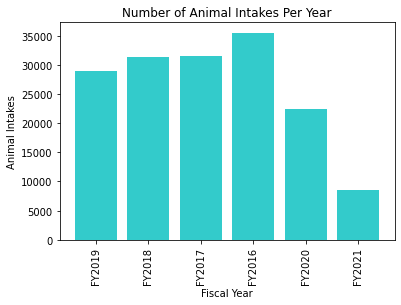

In [17]:
#PLOT IDEA - BAR CHART 
years = dallas_shelter_data["Year"].value_counts()
x_axis = years.index.values

plt.bar(x_axis, yearCount, color='c', alpha=0.8, align='center')
plt.xlabel("Fiscal Year")
plt.ylabel("Animal Intakes")
plt.title("Number of Animal Intakes Per Year")
plt.xticks(rotation="vertical")
plt.show()



In [18]:
#GET INFORMATION ON HOW LONG ANIMALS WERE IN SHELTER

bins = [pd.Timedelta("0 days"), pd.Timedelta("9 days"), pd.Timedelta("19 days"),pd.Timedelta("29 days"), pd.Timedelta("39 days"), pd.Timedelta("150 days")]
time_labels = ["<10", "10-19", "20-29", "30-39", "40+"]

dallas_shelter_data["Time in Shelter (Days)"] = pd.cut(dallas_shelter_data["Time in Shelter"], bins, labels=time_labels)
groupby_time = dallas_shelter_data.groupby(["Time in Shelter (Days)"])

animalCount = groupby_time["Animal Id"].nunique()
timePercent = animalCount / totalAnimals * 100

time_demographics = pd.DataFrame({"Animals": animalCount,
                                 "Percent of Animals": timePercent})

time_demographics["Percent of Animals"] = time_demographics["Percent of Animals"].map("{:.2f}%".format)

time_demographics


,Animals,Percent of Animals
Time in Shelter (Days),,
<10,82528,54.95%
10-19,24121,16.06%
20-29,6072,4.04%
30-39,5445,3.63%
40+,3051,2.03%


In [19]:
#COMBINE LONG HAIR AND SHORT HAIR CHIHUAHUAS WITH CHIHUAHUAS, COMBINE ROUGH & SMOOTH COLLIES
dallas_shelter_data['Animal Breed'] = dallas_shelter_data['Animal Breed'].replace(['CHIHUAHUA SH','CHIHUAHUA LH','COLLIE SMOOTH','COLLIE ROUGH'],
                                                          ['CHIHUAHUA','CHIHUAHUA','COLLIE', 'COLLIE'])

#CREATE SEPARATE DATAFRAMES FOR EACH ANIMAL TYPE FOR MORE DETAILED ANALYSIS
dogs_df = dallas_shelter_data.loc[dallas_shelter_data["Animal Type"] == "DOG",:]
cats_df = dallas_shelter_data.loc[dallas_shelter_data["Animal Type"] == "CAT",:]
birds_df = dallas_shelter_data.loc[dallas_shelter_data["Animal Type"] == "BIRD",:]
livestock_df = dallas_shelter_data.loc[dallas_shelter_data["Animal Type"] == "LIVESTOCK",:]
wildlife_df = dallas_shelter_data.loc[dallas_shelter_data["Animal Type"] == "WILDLIFE",:]

In [20]:
#GATHER INFORMATION ON HOW MANY OF EACH TYPE OF ANIMAL WERE ADMITTED TO SHELTERS
groupby_dogs_year = dogs_df.groupby(["Year"])
num_dogs_year = groupby_dogs_year["Animal Id"].nunique()

groupby_cats_year = cats_df.groupby(["Year"])
num_cats_year = groupby_cats_year["Animal Id"].nunique()

groupby_birds_year = birds_df.groupby(["Year"])
num_birds_year = groupby_birds_year["Animal Id"].nunique()

groupby_livestock_year = livestock_df.groupby(["Year"])
num_livestock_year = groupby_livestock_year["Animal Id"].nunique()

groupby_wildlife_year = wildlife_df.groupby(["Year"])
num_wildlife_year = groupby_wildlife_year["Animal Id"].nunique()


animals_per_year = pd.DataFrame({"Total Dogs Admitted": num_dogs_year,
                                "Total Cats Admitted": num_cats_year,
                                "Total Birds Admitted": num_birds_year,
                                "Total Livestock Admitted": num_livestock_year,
                                "Total Wildlife Admitted": num_wildlife_year,
                                "Total Animals Admitted": yearCount})

animals_per_year


,Total Dogs Admitted,Total Cats Admitted,Total Birds Admitted,Total Livestock Admitted,Total Wildlife Admitted,Total Animals Admitted
Year,,,,,,
FY2016,20205,6909,403,30,1350,28897
FY2017,23159,7082,304,16,737,31298
FY2018,22777,7387,372,22,982,31541
FY2019,25799,8234,372,26,1114,35545
FY2020,16440,4709,283,27,1018,22477
FY2021,6330,1627,118,18,368,8461


In [21]:
#LIST DOGS BREEDS TO SEARCH FOR ANY DUPLICATES OR SPELLING CHANGES BETWEEN YEARS
dogbreeds_type_list = dogs_df['Animal Breed'].unique()
dogbreeds_type_list

array(['LABRADOR RETR', 'PIT BULL', 'GERM SHEPHERD', 'PITBULL',
       'ROTTWEILER', 'GOLDEN RETR', 'BEAGLE', 'POMERANIAN', 'DACHSHUND',
       'CHINESE SHARPEI', 'CHIHUAHUA', 'POODLE MIN', 'BORDER COLLIE',
       'DACHSHUND LH', 'MIXED', 'SHEPHERD MIX', 'QUEENSLAND HEEL',
       'COCKER SPAN', 'ENG SPRNGR SPAN', 'ALASKAN HUSKY',
       'DOBERMAN PINSCH', 'CHOW CHOW', 'BOXER', 'BULL TERRIER',
       'CAIRN TERRIER', 'SIBERIAN HUSKY', 'AUST SHEPHERD', 'COLLIE',
       'PARSON RUSS TER', 'YORKSHIRE TERR', 'RAT TERRIER',
       'AM PIT BULL TER', 'PUG', 'AKITA', 'SCHNAUZER STAND',
       'AIREDALE TERR', 'BEAGLE MIX', 'HUSKY', 'GREAT PYRENEES',
       'AMERICAN STAFF', 'SCHNAUZER MIN', 'BLOODHOUND', 'SHIH TZU',
       'POODLE MIX', 'BORDER TERRIER', 'PAPILLON', 'CAVALIER SPAN',
       'BASSET HOUND', 'LHASA APSO', 'STAFFORDSHIRE', 'AMER ESKIMO',
       'BASENJI', 'FOX TERR WIRE', 'SC WHEAT TERR', 'WEIMARANER',
       'SHEPHERD', 'BICHON FRISE', 'AUST CATTLE DOG', 'WELSH CORGI CAR',
      

In [22]:
groupby_dogbreed = dogs_df.groupby(['Animal Breed'])
num_dogs_breed = groupby_dogbreed["Animal Id"].nunique()
dogs_per_breed = pd.DataFrame({"Number of Breed": num_dogs_breed})

dogs_per_breed

,Number of Breed
Animal Breed,
AFFENPINSCHER,45
AFGHAN HOUND,3
AIREDALE TERR,52
AKBASH,1
AKITA,227
...,...
WEST HIGHLAND,85
WH PT GRIFFON,10
WHIPPET,41


In [23]:
# MOST COMMON DOG TYPE FOUND IN SHELTER
dog_column = dogs_per_breed["Number of Breed"]
max_breed = dog_column.max()
index_max_breed = dog_column.idxmax()

print(max_breed)
print(index_max_breed)

23136
PIT BULL


In [24]:
# TOP 10 MOST COMMON DOG BREEDS
dogs_per_breed.sort_values(by=['Number of Breed'], ascending=False).head(10)

,Number of Breed
Animal Breed,
PIT BULL,23136
CHIHUAHUA,16235
GERM SHEPHERD,13458
LABRADOR RETR,12971
CAIRN TERRIER,3223
ROTTWEILER,1900
ALASKAN HUSKY,1751
SHIH TZU,1745
AUST CATTLE DOG,1611


In [25]:
# GET YEARLY TRENDS FOR TOP TEN BREEDS PER FY
pitbulls_df = dogs_df.loc[dogs_df["Animal Breed"] == "PIT BULL",:]
groupby_pitbulls_year = pitbulls_df.groupby(["Year"])
num_pitbulls_year = groupby_pitbulls_year["Animal Id"].nunique()

chihuahuas_df = dogs_df.loc[dogs_df["Animal Breed"] == "CHIHUAHUA",:]
groupby_chihuahuas_year = chihuahuas_df.groupby(["Year"])
num_chihuahuas_year = groupby_chihuahuas_year["Animal Id"].nunique()

germshep_df = dogs_df.loc[dogs_df["Animal Breed"] == "GERM SHEPHERD",:]
groupby_germshep_year = germshep_df.groupby(["Year"])
num_germshep_year = groupby_germshep_year["Animal Id"].nunique()

lab_df = dogs_df.loc[dogs_df["Animal Breed"] == "LABRADOR RETR",:]
groupby_lab_year = lab_df.groupby(["Year"])
num_lab_year = groupby_lab_year["Animal Id"].nunique()

cairn_df = dogs_df.loc[dogs_df["Animal Breed"] == "CAIRN TERRIER",:]
groupby_cairn_year = cairn_df.groupby(["Year"])
num_cairn_year = groupby_cairn_year["Animal Id"].nunique()

rott_df = dogs_df.loc[dogs_df["Animal Breed"] == "ROTTWEILER",:]
groupby_rott_year = rott_df.groupby(["Year"])
num_rott_year = groupby_rott_year["Animal Id"].nunique()

husky_df = dogs_df.loc[dogs_df["Animal Breed"] == "ALASKAN HUSKY",:]
groupby_husky_year = husky_df.groupby(["Year"])
num_husky_year = groupby_husky_year["Animal Id"].nunique()

shihtzu_df = dogs_df.loc[dogs_df["Animal Breed"] == "SHIH TZU",:]
groupby_shihtzu_year = shihtzu_df.groupby(["Year"])
num_shihtzu_year = groupby_shihtzu_year["Animal Id"].nunique()

cattledog_df = dogs_df.loc[dogs_df["Animal Breed"] == "AUST CATTLE DOG",:]
groupby_cattledog_year = cattledog_df.groupby(["Year"])
num_cattledog_year = groupby_cattledog_year["Animal Id"].nunique()

boxer_df = dogs_df.loc[dogs_df["Animal Breed"] == "BOXER",:]
groupby_boxer_year = boxer_df.groupby(["Year"])
num_boxer_year = groupby_boxer_year["Animal Id"].nunique()


percent_total_pitbulls = num_pitbulls_year / num_dogs_year * 100
percent_total_chihuahuas = num_chihuahuas_year / num_dogs_year * 100
percent_total_germshep = num_germshep_year / num_dogs_year * 100
percent_total_lab = num_lab_year / num_dogs_year * 100
percent_total_cairn = num_cairn_year / num_dogs_year * 100
percent_total_rott = num_rott_year / num_dogs_year * 100
percent_total_husky = num_husky_year / num_dogs_year * 100
percent_total_shihtzu = num_shihtzu_year / num_dogs_year * 100
percent_total_cattledog = num_cattledog_year / num_dogs_year * 100
percent_total_boxer = num_boxer_year / num_dogs_year * 100


dog_breeds_per_year = pd.DataFrame({"Total Dogs Admitted": num_dogs_year,
                                "Total Pitbulls": num_pitbulls_year,
                                "Percent Pitbulls": percent_total_pitbulls,
                                "Total Chihuahuas": num_chihuahuas_year,
                                "Percent Chihuahuas": percent_total_chihuahuas,
                                "Total German Shepherds": num_germshep_year,
                                "Percent German Shepherds": percent_total_germshep,
                                "Total Labrador Retrievers": num_lab_year,
                                "Percent Labrador Retrievers": percent_total_lab,
                                "Total Cairn Terriers": num_cairn_year,
                                "Percent Cairn Terriers": percent_total_cairn,
                                "Total Rottweilers": num_rott_year,
                                "Percent Rottweilers": percent_total_rott, 
                                "Total Alaskan Huskies": num_husky_year,
                                "Percent Huskies": percent_total_husky,
                                "Total Shih Tzus": num_shihtzu_year,
                                "Percent Shih Tzus": percent_total_shihtzu,
                                "Total Cattledogs": num_cattledog_year,
                                "Percent Cattledogs": percent_total_cattledog,
                                "Total Boxers": num_boxer_year,
                                "Percent Boxers": percent_total_boxer,
                                "Total Animals Admitted": yearCount})

dog_breeds_per_year["Percent Pitbulls"] = dog_breeds_per_year["Percent Pitbulls"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Chihuahuas"] = dog_breeds_per_year["Percent Chihuahuas"].map("{:.2f}%".format)
dog_breeds_per_year["Percent German Shepherds"] = dog_breeds_per_year["Percent German Shepherds"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Labrador Retrievers"] = dog_breeds_per_year["Percent Labrador Retrievers"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Cairn Terriers"] = dog_breeds_per_year["Percent Cairn Terriers"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Rottweilers"] = dog_breeds_per_year["Percent Rottweilers"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Huskies"] = dog_breeds_per_year["Percent Huskies"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Shih Tzus"] = dog_breeds_per_year["Percent Shih Tzus"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Cattledogs"] = dog_breeds_per_year["Percent Cattledogs"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Boxers"] = dog_breeds_per_year["Percent Boxers"].map("{:.2f}%".format)

dog_breeds_per_year

,Total Dogs Admitted,Total Pitbulls,Percent Pitbulls,Total Chihuahuas,Percent Chihuahuas,Total German Shepherds,Percent German Shepherds,Total Labrador Retrievers,Percent Labrador Retrievers,Total Cairn Terriers,...,Percent Rottweilers,Total Alaskan Huskies,Percent Huskies,Total Shih Tzus,Percent Shih Tzus,Total Cattledogs,Percent Cattledogs,Total Boxers,Percent Boxers,Total Animals Admitted
Year,,,,,,,,,,,,,,,,,,,,,
FY2016,20205,3429,16.97%,2748,13.60%,2524,12.49%,2890,14.30%,600,...,1.85%,223,1.10%,277,1.37%,338,1.67%,368,1.82%,28897
FY2017,23159,5229,22.58%,3631,15.68%,2870,12.39%,2811,12.14%,682,...,1.81%,292,1.26%,346,1.49%,262,1.13%,378,1.63%,31298
FY2018,22777,5236,22.99%,3559,15.63%,2855,12.53%,2715,11.92%,795,...,1.87%,379,1.66%,372,1.63%,342,1.50%,330,1.45%,31541
FY2019,25799,5608,21.74%,4328,16.78%,3154,12.23%,2851,11.05%,824,...,1.47%,465,1.80%,478,1.85%,393,1.52%,316,1.22%,35545
FY2020,16440,3618,22.01%,2233,13.58%,2152,13.09%,1778,10.82%,402,...,1.89%,383,2.33%,303,1.84%,248,1.51%,242,1.47%,22477
FY2021,6330,1622,25.62%,577,9.12%,813,12.84%,779,12.31%,80,...,1.80%,176,2.78%,81,1.28%,121,1.91%,106,1.67%,8461


In [26]:
# FIND AVERAGE LENGTH OF TIME EACH DOG BREED SPENT IN SHELTER

pitbulls_time = pitbulls_df.groupby(["Year"])["Time in Shelter"]
chihuahuas_time = chihuahuas_df.groupby(["Year"])["Time in Shelter"]
germshep_time = germshep_df.groupby(["Year"])["Time in Shelter"]
lab_time = lab_df.groupby(["Year"])["Time in Shelter"]
cairn_time = cairn_df.groupby(["Year"])["Time in Shelter"]
rott_time = rott_df.groupby(["Year"])["Time in Shelter"]
husky_time = husky_df.groupby(["Year"])["Time in Shelter"]
shihtzu_time = shihtzu_df.groupby(["Year"])["Time in Shelter"]
cattledog_time = cattledog_df.groupby(["Year"])["Time in Shelter"]
boxer_time = boxer_df.groupby(["Year"])["Time in Shelter"]
all_dogs_time = dogs_df.groupby(["Year"])["Time in Shelter"]

avg_pitbulls_year = pitbulls_time.apply(lambda x: np.mean(x))
avg_chihuahuas_year = chihuahuas_time.apply(lambda x: np.mean(x))
avg_germshep_year = germshep_time.apply(lambda x: np.mean(x))
avg_lab_year = lab_time.apply(lambda x: np.mean(x))
avg_cairn_year = cairn_time.apply(lambda x: np.mean(x))
avg_rott_year = rott_time.apply(lambda x: np.mean(x))
avg_husky_year = husky_time.apply(lambda x: np.mean(x))
avg_shihtzu_year = shihtzu_time.apply(lambda x: np.mean(x))
avg_cattledog_year = cattledog_time.apply(lambda x: np.mean(x))
avg_boxer_year = boxer_time.apply(lambda x: np.mean(x))
avg_dogs_time = all_dogs_time.apply(lambda x: np.mean(x))


In [27]:
time_in_shelter_per_year = pd.DataFrame({"Average for All Dogs": avg_dogs_time,
                                    "Avg for Pitbulls": avg_pitbulls_year,
                                    "Avg for Chihuahuas": avg_chihuahuas_year,
                                    "Avg for German Shepherds": avg_germshep_year,
                                    "Avg for Labrador Retrievers": avg_lab_year,
                                    "Avg for Cairn Terriers": avg_cairn_year,
                                    "Avg for Rottweilers": avg_rott_year,
                                    "Avg for Alaskan Huskies": avg_husky_year,
                                    "Avg for Shih Tzus": avg_shihtzu_year,
                                    "Avg for Cattledogs": avg_cattledog_year,
                                    "Avg for Boxers": avg_boxer_year})

time_in_shelter_per_year

,Average for All Dogs,Avg for Pitbulls,Avg for Chihuahuas,Avg for German Shepherds,Avg for Labrador Retrievers,Avg for Cairn Terriers,Avg for Rottweilers,Avg for Alaskan Huskies,Avg for Shih Tzus,Avg for Cattledogs,Avg for Boxers
Year,,,,,,,,,,,
FY2016,10 days 04:01:23.095260618,9 days 19:58:34.648602878,9 days 04:04:30.563674321,9 days 09:47:35.927051671,10 days 18:29:52.885375494,7 days 17:53:39.840000,7 days 22:20:03.084832904,9 days 22:05:15.537848605,10 days 12:30:25.352112676,18 days 12:34:40.453257790,10 days 10:30:27.979274611
FY2017,6 days 17:28:00.806921153,7 days 17:06:38.994072211,5 days 03:40:49.840255591,7 days 04:02:17.776311448,7 days 09:20:14.414414414,5 days 01:09:32.727272727,7 days 05:50:10.909090909,6 days 12:37:39.692307692,5 days 01:53:15.505617977,7 days 03:31:28.111888111,7 days 10:13:32.030075188
FY2018,6 days 10:21:33.756827837,8 days 20:58:59.748953974,4 days 07:30:07.122131363,6 days 12:05:05.988409529,7 days 00:37:26.400000,3 days 10:44:45.035629453,7 days 07:05:01.321585903,5 days 10:40:00,2 days 19:44:24,5 days 18:55:00.804289544,6 days 18:13:24.584527220
FY2019,7 days 08:45:44.043746106,9 days 00:22:58.292148889,4 days 10:55:57.166947723,6 days 22:22:39.214586255,8 days 06:33:43.963133640,3 days 13:12:14.611048478,7 days 10:51:45.213270142,5 days 11:09:13.345388788,5 days 16:09:10.669216061,8 days 02:43:38.181818181,10 days 03:56:42.739726027
FY2020,7 days 05:47:17.756087096,7 days 19:09:34.624829468,5 days 18:33:10.194420963,6 days 14:57:59.040000,6 days 13:22:35.982274741,2 days 18:39:37.981651376,6 days 10:35:24.928366762,6 days 16:53:27.582938388,8 days 11:50:53.164556962,4 days 22:20:00,6 days 23:39:25.714285714
FY2021,8 days 06:19:40.665562415,8 days 07:22:11.506849315,7 days 14:30:41.860465116,6 days 16:01:38.293515358,6 days 07:14:58.903775883,5 days 18:22:13.333333333,6 days 13:54:57.478991596,7 days 07:23:43.255813953,8 days 16:35:17.647058823,6 days 17:08:34.285714285,9 days 17:44:52.436974789


In [28]:
API_petfinder_data = "Resources/Animals.csv"
petfinder_df_pre = pd.read_csv(API_petfinder_data)

In [29]:
petfinder_df_pre.head(15)

,Unnamed: 0,id,organization_id,url,type,species,age,gender,size,coat,...,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id.1,primary_photo_cropped.small,primary_photo_cropped.medium,primary_photo_cropped.large,primary_photo_cropped.full
0,0,51329854,CO502,https://www.petfinder.com/cat/bird-51329854/co...,Cat,Cat,Young,Male,Medium,NaN,...,CO,80304,US,51329854,cat,co502,NaN,NaN,NaN,NaN
1,1,51329850,IA172,https://www.petfinder.com/dog/negan-51329850/i...,Dog,Dog,Adult,Male,Large,NaN,...,IA,50265,US,51329850,dog,ia172,NaN,NaN,NaN,NaN
2,2,51329851,IA172,https://www.petfinder.com/dog/kong-51329851/ia...,Dog,Dog,Senior,Male,Medium,NaN,...,IA,50265,US,51329851,dog,ia172,NaN,NaN,NaN,NaN
3,3,51329852,IA172,https://www.petfinder.com/dog/ziko-51329852/ia...,Dog,Dog,Adult,Male,Large,NaN,...,IA,50265,US,51329852,dog,ia172,NaN,NaN,NaN,NaN
4,4,51329853,IA172,https://www.petfinder.com/dog/coco-51329853/ia...,Dog,Dog,Senior,Female,Small,NaN,...,IA,50265,US,51329853,dog,ia172,NaN,NaN,NaN,NaN
5,5,51329848,TX1633,https://www.petfinder.com/dog/augustus-5132984...,Dog,Dog,Baby,Male,Small,NaN,...,TX,78227,US,51329848,dog,tx1633,NaN,NaN,NaN,NaN
6,6,51329849,TX1633,https://www.petfinder.com/dog/aurelia-51329849...,Dog,Dog,Baby,Female,Small,NaN,...,TX,78227,US,51329849,dog,tx1633,NaN,NaN,NaN,NaN
7,7,51329846,ME30,https://www.petfinder.com/dog/baxter-51329846/...,Dog,Dog,Adult,Male,Medium,NaN,...,ME,04011,US,51329846,dog,me30,NaN,NaN,NaN,NaN
8,8,51329818,MN36,https://www.petfinder.com/dog/rose-51329818/mn...,Dog,Dog,Adult,Female,Medium,Short,...,MN,55419,US,51329818,dog,mn36,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
9,9,51329843,CA190,https://www.petfinder.com/cat/rosa-51329843/ca...,Cat,Cat,Adult,Female,Medium,NaN,...,CA,92027,US,51329843,cat,ca190,NaN,NaN,NaN,NaN


In [30]:
# GET RID OF UNNCESSARY INFO FROM PETFINDER DATA

petfinder_df = petfinder_df_pre.drop(columns=['distance','animal_type', 'contact.address.postcode','animal_id', 'organization_id','attributes.declawed','colors.primary','attributes.house_trained','colors.secondary','colors.tertiary','attributes.spayed_neutered','contact.phone','attributes.shots_current','contact.address.address2', 'attributes.special_needs','contact.address.address1', 'environment.children','contact.email', 'contact.email', 'videos','environment.dogs','url', 'coat', 'contact.address.country', 'organization_id.1', 'primary_photo_cropped.small', 'primary_photo_cropped.medium','primary_photo_cropped.large', 'primary_photo_cropped.full', 'Unnamed: 0', 'tags', 'name', 'description', 'environment.cats','organization_animal_id','photos','primary_photo_cropped'])
petfinder_df['status_changed_at'] = pd.to_datetime(petfinder_df['status_changed_at'])

petfinder_df.head(10)

,id,type,species,age,gender,size,status,status_changed_at,published_at,breeds.primary,breeds.secondary,breeds.mixed,breeds.unknown,contact.address.city,contact.address.state
0,51329854,Cat,Cat,Young,Male,Medium,adoptable,2021-04-24 16:40:31+00:00,2021-04-24T16:40:31+0000,Domestic Short Hair,NaN,False,False,Boulder,CO
1,51329850,Dog,Dog,Adult,Male,Large,adoptable,2021-04-24 16:40:15+00:00,2021-04-24T16:40:15+0000,Bullmastiff,NaN,True,False,West Des Moines,IA
2,51329851,Dog,Dog,Senior,Male,Medium,adoptable,2021-04-24 16:40:15+00:00,2021-04-24T16:40:15+0000,Black Labrador Retriever,NaN,True,False,West Des Moines,IA
3,51329852,Dog,Dog,Adult,Male,Large,adoptable,2021-04-24 16:40:15+00:00,2021-04-24T16:40:15+0000,Anatolian Shepherd,NaN,True,False,West Des Moines,IA
4,51329853,Dog,Dog,Senior,Female,Small,adoptable,2021-04-24 16:40:15+00:00,2021-04-24T16:40:15+0000,Pekingese,NaN,False,False,West Des Moines,IA
5,51329848,Dog,Dog,Baby,Male,Small,adoptable,2021-04-24 16:40:15+00:00,2021-04-24T16:40:15+0000,Black Labrador Retriever,NaN,False,False,San Antonio,TX
6,51329849,Dog,Dog,Baby,Female,Small,adoptable,2021-04-24 16:40:15+00:00,2021-04-24T16:40:15+0000,Black Labrador Retriever,NaN,False,False,San Antonio,TX
7,51329846,Dog,Dog,Adult,Male,Medium,adoptable,2021-04-24 16:40:10+00:00,2021-04-24T16:40:10+0000,Terrier,Mixed Breed,True,False,Brunswick,ME
8,51329818,Dog,Dog,Adult,Female,Medium,adoptable,2021-04-24 16:39:39+00:00,2021-04-24T16:39:39+0000,Pit Bull Terrier,NaN,False,False,Minneapolis,MN
9,51329843,Cat,Cat,Adult,Female,Medium,adoptable,2021-04-24 16:38:35+00:00,2021-04-24T16:38:35+0000,Domestic Short Hair,NaN,True,False,Escondido,CA


In [31]:
# CREATE A SEPARATE DATAFRAME FOR DALLAS ONLY

dallas_petfinder_df = petfinder_df.loc[petfinder_df["contact.address.city"] == "Dallas",:]
dallas_petfinder_df.head()

,id,type,species,age,gender,size,status,status_changed_at,published_at,breeds.primary,breeds.secondary,breeds.mixed,breeds.unknown,contact.address.city,contact.address.state
177,51329633,Dog,Dog,Adult,Female,Small,adoptable,2021-04-24 16:24:37+00:00,2021-04-24T16:24:37+0000,Chihuahua,NaN,False,False,Dallas,TX
180,51329632,Dog,Dog,Young,Male,Large,adoptable,2021-04-24 16:24:36+00:00,2021-04-24T16:24:36+0000,Pit Bull Terrier,NaN,False,False,Dallas,TX
1141,51328542,Cat,Cat,Adult,Female,Medium,adoptable,2021-04-24 14:49:28+00:00,2021-04-24T14:49:28+0000,Domestic Short Hair,NaN,False,False,Dallas,TX
1312,51327994,Dog,Dog,Young,Female,Large,adoptable,2021-04-24 14:24:18+00:00,2021-04-24T14:24:18+0000,German Shepherd Dog,NaN,False,False,Dallas,TX
1314,51327995,Dog,Dog,Young,Male,Medium,adoptable,2021-04-24 14:24:18+00:00,2021-04-24T14:24:18+0000,Shih Tzu,NaN,False,False,Dallas,TX


In [32]:
#LOOK AT COLUMN DTYPES
dallas_petfinder_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 177 to 9641
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     77 non-null     int64              
 1   type                   77 non-null     object             
 2   species                77 non-null     object             
 3   age                    77 non-null     object             
 4   gender                 77 non-null     object             
 5   size                   77 non-null     object             
 6   status                 77 non-null     object             
 7   status_changed_at      77 non-null     datetime64[ns, UTC]
 8   published_at           77 non-null     object             
 9   breeds.primary         77 non-null     object             
 10  breeds.secondary       27 non-null     object             
 11  breeds.mixed           77 non-null     bool             

In [33]:
#ADD TIMESTAMP FOR WHEN DATA WAS EXTRACTED FROM PETFINDER
extract_date = pd.Timestamp("2021-04-24 16:30:00").tz_localize("UTC")
extract_date

Timestamp('2021-04-24 16:30:00+0000', tz='UTC')

In [35]:
#ADD TIME ON PETFINDER AS COLUMN

time_on_pf = extract_date - dallas_petfinder_df["status_changed_at"] # convert status changed to ts
dallas_petfinder_df.insert(1, "Time on Petfinder", time_on_pf, True)
dallas_petfinder_df

,id,Time on Petfinder,Time on Petfinder,type,species,age,gender,size,status,status_changed_at,published_at,breeds.primary,breeds.secondary,breeds.mixed,breeds.unknown,contact.address.city,contact.address.state
177,51329633,0 days 00:05:23,0 days 00:05:23,Dog,Dog,Adult,Female,Small,adoptable,2021-04-24 16:24:37+00:00,2021-04-24T16:24:37+0000,Chihuahua,NaN,False,False,Dallas,TX
180,51329632,0 days 00:05:24,0 days 00:05:24,Dog,Dog,Young,Male,Large,adoptable,2021-04-24 16:24:36+00:00,2021-04-24T16:24:36+0000,Pit Bull Terrier,NaN,False,False,Dallas,TX
1141,51328542,0 days 01:40:32,0 days 01:40:32,Cat,Cat,Adult,Female,Medium,adoptable,2021-04-24 14:49:28+00:00,2021-04-24T14:49:28+0000,Domestic Short Hair,NaN,False,False,Dallas,TX
1312,51327994,0 days 02:05:42,0 days 02:05:42,Dog,Dog,Young,Female,Large,adoptable,2021-04-24 14:24:18+00:00,2021-04-24T14:24:18+0000,German Shepherd Dog,NaN,False,False,Dallas,TX
1314,51327995,0 days 02:05:42,0 days 02:05:42,Dog,Dog,Young,Male,Medium,adoptable,2021-04-24 14:24:18+00:00,2021-04-24T14:24:18+0000,Shih Tzu,NaN,False,False,Dallas,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9309,51312179,1 days 18:08:56,1 days 18:08:56,Cat,Cat,Baby,Female,Small,adoptable,2021-04-22 22:21:04+00:00,2021-04-22T22:21:04+0000,Domestic Medium Hair,NaN,False,False,Dallas,TX
9311,51312173,1 days 18:08:57,1 days 18:08:57,Cat,Cat,Baby,Female,Small,adoptable,2021-04-22 22:21:03+00:00,2021-04-22T22:21:03+0000,Domestic Medium Hair,NaN,False,False,Dallas,TX
9639,51311267,1 days 19:09:10,1 days 19:09:10,Dog,Dog,Adult,Male,Small,adoptable,2021-04-22 21:20:50+00:00,2021-04-22T21:20:50+0000,Chihuahua,Mixed Breed,True,False,Dallas,TX
9640,51311268,1 days 19:09:10,1 days 19:09:10,Dog,Dog,Young,Female,Small,adoptable,2021-04-22 21:20:50+00:00,2021-04-22T21:20:50+0000,Labrador Retriever,Mixed Breed,True,False,Dallas,TX


In [37]:
mean_time = dallas_petfinder_df["Time on Petfinder"].mean()
mean_time

Time on Petfinder   0 days 22:53:27.974025974
Time on Petfinder   0 days 22:53:27.974025974
dtype: timedelta64[ns]